In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from torchvision import datasets, transforms, models

In [5]:
train_transforms = transforms.Compose([transforms.Resize((150,150)),
                                      transforms.ColorJitter(),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5])
                                      ])


test_transforms = transforms.Compose([transforms.Resize((150,150)),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.5, 0.5, 0.5],
                                                           [0.5, 0.5, 0.5]),
                                      
                                     
])

train_data = datasets.ImageFolder('Wild Image Classification\\seg_train\\seg_train',transform=train_transforms)

test_data=datasets.ImageFolder('Wild Image Classification\\seg_test\\seg_test',transform=test_transforms)

model=models.vgg16(pretrained=True)


for param in model.features.parameters():
    param.requires_grad = False
    
model

c:\Users\Sejin\.conda\envs\Enterprise_Membership_AI\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Sejin\.conda\envs\Enterprise_Membership_AI\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to C:\Users\Sejin/.cache\torch\hub\checkpoints\vgg16-397923af.pth
100%|██████████| 528M/528M [00:47<00:00, 11.6MB/s] 


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [7]:
model.classifier=nn.Sequential(
     nn.Linear(in_features=25088, out_features=4096, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=4096, out_features=1000, bias=True),
     nn.ReLU(inplace=True),
     nn.Dropout(p=0.5, inplace=False),
     nn.Linear(in_features=1000, out_features=1000, bias=True),
     nn.ReLU(),
     nn.Dropout(p=0.6,inplace=False),
     nn.Linear(in_features=1000,out_features=512),
     nn.ReLU(),
     nn.Linear(in_features=512,out_features=6)
)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters(), lr=0.000025)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda:0


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, 
                                           batch_size=256, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data, 
                                          batch_size=64, 
                                          shuffle=False)

In [11]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    t0 = datetime.now()
    train_loss = []
    for inputs, targets in train_loader:
      
      inputs, targets = inputs.to(device), targets.to(device)

      optimizer.zero_grad()

      outputs = model(inputs)

      loss = criterion(outputs, targets)
        

      loss.backward()
      optimizer.step()

      train_loss.append(loss.item())

  
    train_loss = np.mean(train_loss) 
    
    test_loss = []
    for inputs, targets in test_loader:
      inputs, targets = inputs.to(device), targets.to(device)
      outputs = model(inputs)
      loss = criterion(outputs, targets)
      test_loss.append(loss.item())
    test_loss = np.mean(test_loss)


    train_losses[it] = train_loss
    test_losses[it] = test_loss
    
    dt = datetime.now() - t0
    print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
      Test Loss: {test_loss:.4f}, Duration: {dt}')
  
  return train_losses, test_losses

In [12]:
train_losses, test_losses = batch_gd(
    model, criterion, optimizer, train_loader, test_loader, epochs=20)

Epoch 1/20, Train Loss: 1.2185,       Test Loss: 0.4991, Duration: 0:00:40.251490
Epoch 2/20, Train Loss: 0.3956,       Test Loss: 0.3335, Duration: 0:00:27.862504
Epoch 3/20, Train Loss: 0.3070,       Test Loss: 0.3018, Duration: 0:00:28.368151
Epoch 4/20, Train Loss: 0.2707,       Test Loss: 0.2697, Duration: 0:00:27.581256
Epoch 5/20, Train Loss: 0.2467,       Test Loss: 0.2682, Duration: 0:00:27.445618
Epoch 6/20, Train Loss: 0.2309,       Test Loss: 0.2533, Duration: 0:00:27.312973
Epoch 7/20, Train Loss: 0.2189,       Test Loss: 0.2518, Duration: 0:00:27.638103
Epoch 8/20, Train Loss: 0.2044,       Test Loss: 0.2495, Duration: 0:00:27.528397
Epoch 9/20, Train Loss: 0.1913,       Test Loss: 0.2445, Duration: 0:00:27.358851
Epoch 10/20, Train Loss: 0.1791,       Test Loss: 0.2439, Duration: 0:00:27.453598
Epoch 11/20, Train Loss: 0.1712,       Test Loss: 0.2498, Duration: 0:00:27.375804
Epoch 12/20, Train Loss: 0.1625,       Test Loss: 0.2482, Duration: 0:00:27.690963
Epoch 13/20, 

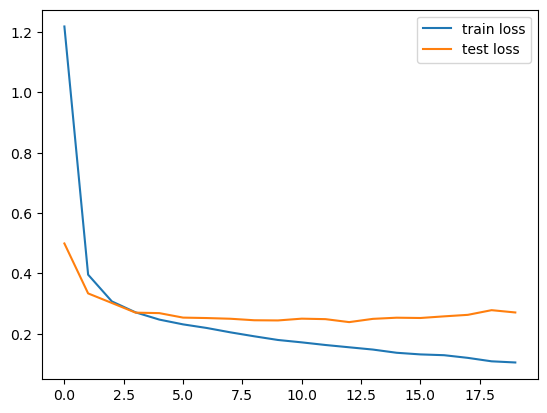

In [13]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

In [14]:
# Accuracy

n_correct = 0.
n_total = 0.
for inputs, targets in train_loader:

  inputs, targets = inputs.to(device), targets.to(device)

  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total


n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:

  inputs, targets = inputs.to(device), targets.to(device)


  outputs = model(inputs)

  _, predictions = torch.max(outputs, 1)
  

  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9686, Test acc: 0.9143


In [33]:
torch.save(model.state_dict,'Wild Image Classification/Model/VGG-16_v1')

Mountain


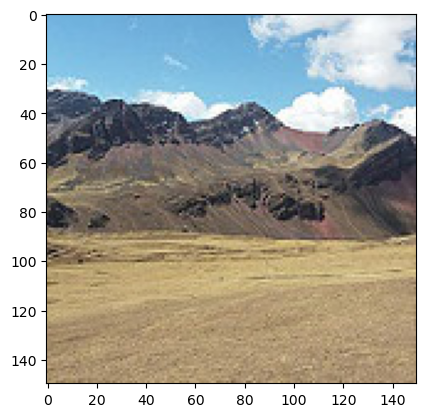

In [35]:
from PIL import Image
import numpy as np

img = Image.open('Wild Image Classification/seg_pred/seg_pred/3966.jpg')

nimg = np.array(img)
plt.imshow(nimg)

pimg = test_transforms(img).unsqueeze(0).to(device)
prediction = model(pimg)
_, tpredict = torch.max(prediction, 1)

classes={
    0:'Buuildings',
    1:'Forest',
    2:'Glacier',
    3:'Mountain',
    4:'Sea',
    5:'Street'
}

#print(tpredict)
print(classes[tpredict[0].item()])